/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


old model: Gau(dim=2, var=2.0, len_scale=10.0, nugget=0.0)
new model: Gau(dim=3, var=1.0, len_scale=15.0, nugget=0.1)


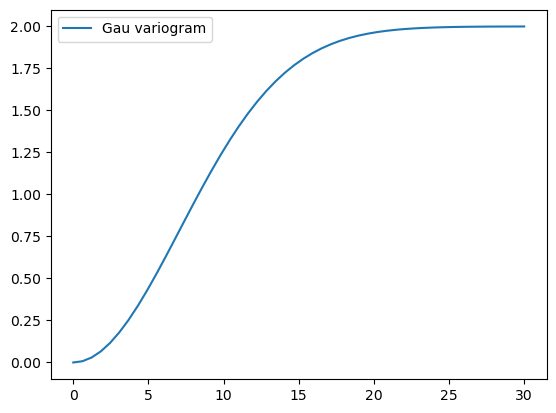

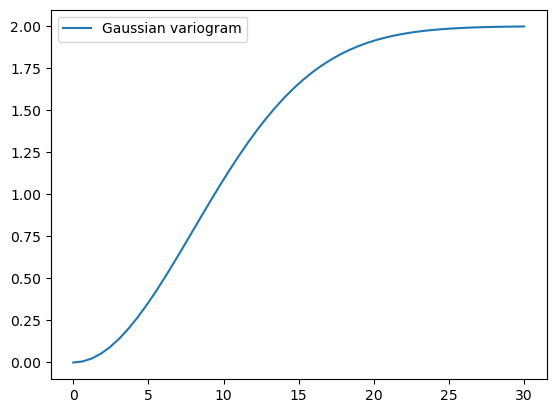

In [1]:
"""
Introductory example
====================

Let us start with a short example of a self defined model (Of course, we
provide a lot of predefined models [See: :any:`gstools.covmodel`],
but they all work the same way).
Therefore we reimplement the Gaussian covariance model
by defining just the "normalized"
`correlation <https://en.wikipedia.org/wiki/Autocovariance#Normalization>`_
function:
"""

import numpy as np

import gstools as gs


# use CovModel as the base-class
class Gau(gs.CovModel):
    def cor(self, h):
        return np.exp(-(h**2))


###############################################################################
# Here the parameter ``h`` stands for the normalized range ``r / len_scale``.
# Now we can instantiate this model:

model = Gau(dim=2, var=2.0, len_scale=10)

###############################################################################
# To have a look at the variogram, let's plot it:

model.plot()

###############################################################################
# This is almost identical to the already provided :any:`Gaussian` model.
# There, a scaling factor is implemented so the len_scale coincides with the
# integral scale:

gau_model = gs.Gaussian(dim=2, var=2.0, len_scale=10)
gau_model.plot()


###############################################################################
# Parameters
# ----------
#
# We already used some parameters, which every covariance models has.
# The basic ones are:
#
#     - **dim** : dimension of the model
#     - **var** : variance of the model (on top of the subscale variance)
#     - **len_scale** : length scale of the model
#     - **nugget** : nugget (subscale variance) of the model
#
# These are the common parameters used to characterize
# a covariance model and are therefore used by every model in GSTools.
# You can also access and reset them:

print("old model:", model)
model.dim = 3
model.var = 1
model.len_scale = 15
model.nugget = 0.1
print("new model:", model)


###############################################################################
# .. note::
#
#    - The sill of the variogram is calculated by ``sill = variance + nugget``
#      So we treat the variance as everything **above** the nugget,
#      which is sometimes called **partial sill**.
#    - A covariance model can also have additional parameters.


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:136: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

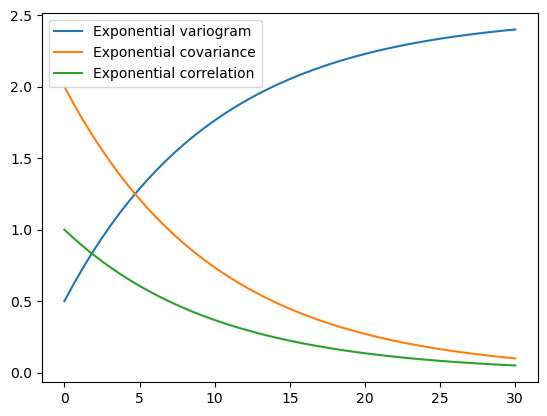

In [2]:
r"""
Basic Methods
=============

The covariance model class :any:`CovModel` of GSTools provides a set of handy
methods.

One of the following functions defines the main characterization of the
variogram:

- ``CovModel.variogram`` : The variogram of the model given by

  .. math::
      \gamma\left(r\right)=
      \sigma^2\cdot\left(1-\rho\left(r\right)\right)+n

- ``CovModel.covariance`` : The (auto-)covariance of the model given by

  .. math::
      C\left(r\right)= \sigma^2\cdot\rho\left(r\right)

- ``CovModel.correlation`` : The (auto-)correlation
  (or normalized covariance) of the model given by

  .. math::
      \rho\left(r\right)

- ``CovModel.cor`` : The normalized correlation taking a
  normalized range given by:

  .. math::
      \mathrm{cor}\left(\frac{r}{\ell}\right) = \rho\left(r\right)


As you can see, it is the easiest way to define a covariance model by giving a
correlation function as demonstrated in the introductory example.
If one of the above functions is given, the others will be determined:
"""
import gstools as gs

model = gs.Exponential(dim=3, var=2.0, len_scale=10, nugget=0.5)
ax = model.plot("variogram")
model.plot("covariance", ax=ax)
model.plot("correlation", ax=ax)
